# 6.4 Supervised Machine Learning

## Index
## 1. Import Libraries and Data
## 2. Data Cleaning
## 3. Prep Data for Regression Analysis
## 4. Regression Analysis

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To ensure graphs created are displayed in notebook without being called
%matplotlib inline

In [3]:
#create a path for data
path = r'C:\Users\Spero\Documents\Boat Sales Analysis'

In [4]:
# import data
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col= False)

In [5]:
df_boat

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Currency,EURO Price,Country,City
0,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490.00,Germany,BÃ¶nningstedt
1,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399.00,Germany,Bayern
2,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,CHF,3535.00,Switzerland,Seengen
3,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,EUR,3500.00,Italy,Lake Garda
4,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,CHF,4646.00,Switzerland,Zugersee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,5000,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,1299,CHF,5050.00,Switzerland,Rhein
5997,4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,1917,CHF,5048.99,Switzerland,Lake of Zurich
5998,4950,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,288,CHF,4999.50,Switzerland,Bielersee
5999,4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,EUR,4499.00,Germany,Nordrhein-Westfalen


# 2. Data Cleaning

In [6]:
df_boat.shape

(6001, 13)

In [7]:
# checking dataframe for missing values
df_boat.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
Currency                       0
EURO Price                     0
Country                        0
City                           0
dtype: int64

In [8]:
# checking dataframe for duplicate values
no_dups = df_boat.duplicated()

In [9]:
no_dups.shape

(6001,)

C:\Users\Spero\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

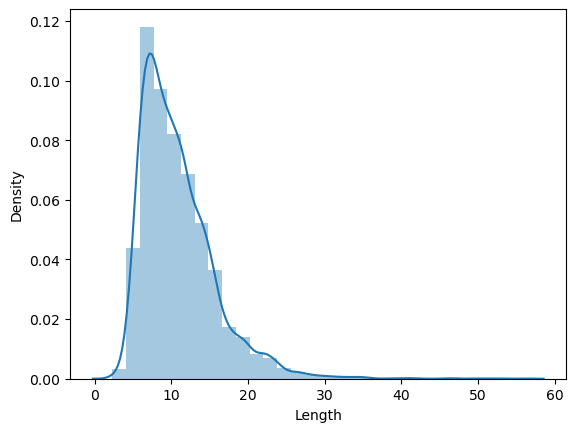

In [10]:
# checking for outliers
sns.distplot(df_boat['Length'], bins=30)

In [11]:
# check the mean of the Length column
df_boat['Length'].mean()

10.834530911514786

In [12]:
# checking the median of the Length Column
df_boat['Length'].median()

9.88

In [13]:
# Checking for the max value in the length column
df_boat['Length'].max()

56.0

# 3. Prep Data for Regression Analysis

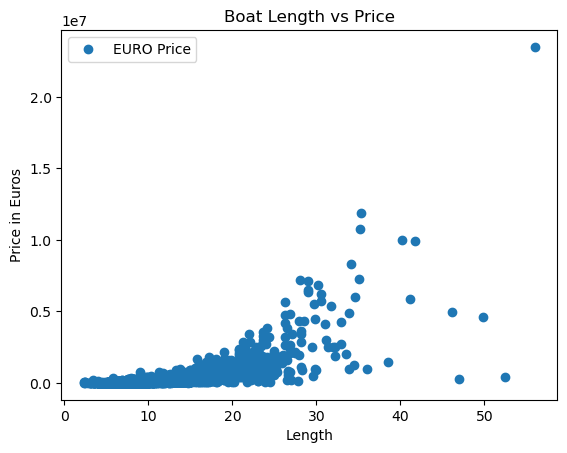

In [14]:
# Create a scatterplot to see how the variables plot against each other
df_boat.plot(x = 'Length', y='EURO Price', style='o')
plt.title('Boat Length vs Price')
plt.xlabel('Length')
plt.ylabel('Price in Euros')
plt.show()

In [15]:
#Reshaping variables into NumPy arrarys annd place them in their ouwn objects
X = df_boat['Length'].values.reshape(-1,1)
y = df_boat['EURO Price'].values.reshape(-1,1)

In [16]:
X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [17]:
y

array([[3490. ],
       [3399. ],
       [3535. ],
       ...,
       [4999.5],
       [4499. ],
       [3817.8]])

In [18]:
# Split data into sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# My hypothesis for this regression model is the length of the boat determines the price of the boat. If the boat has a higher length then the price will increase.

# 4. Regression Analysis

In [19]:
# Create a regression onject
regression = LinearRegression()

In [20]:
# Fit the regression object into the training set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the values of y by using the values of X
y_predicted = regression.predict(X_test)

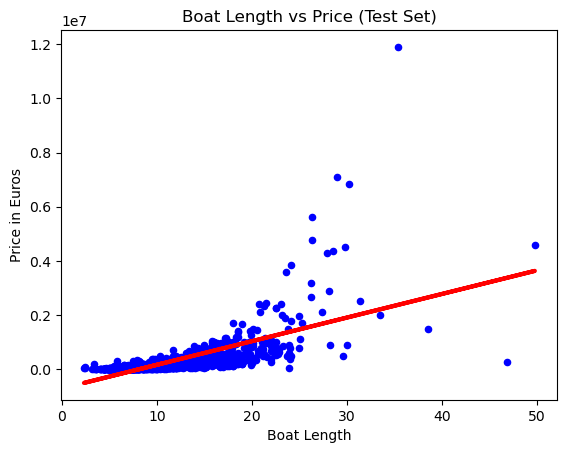

In [22]:
#Create a scatter plot that uses the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s= 20)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Boat Length vs Price (Test Set)')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Price in Euros')
plot_test.show()

In [23]:
# create objects to check model summary
rsme = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# check model summary
print('Slope:' , regression.coef_)
print('Mean squared error: ', rsme)
print('R2 score: ', r2)

Slope: [[87136.89965407]]
Mean squared error:  188072770517.24118
R2 score:  0.3753624993083643


# Ananlysis
## The slope shows a positive relationship. The slope does align with the hypothesis of higher boath length means a higher price. However the MSE is 188072770517 which is very high. This means that the regression line doesn't represent the data. Finally the R2 score is 0.38 with the score being close to 0 means it is a poor fit.

In [25]:
y_predicted

array([[ 193169.69573159],
       [-144050.10592967],
       [ 209725.70666586],
       ...,
       [-137950.52295389],
       [  10182.20645803],
       [  -4631.06648316]])

In [26]:
# make a new dataframe to compare the actual values vs. the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [27]:
df.head(50)

,Actual,Predicted
0,69900.0,1.931697e+05
1,55449.0,-1.440501e+05
2,90000.0,2.097257e+05
3,38900.0,7.553488e+04
4,150000.0,-5.778458e+04
5,187000.0,8.860542e+04
6,34500.0,-8.479701e+04
7,575000.0,1.147319e+06
8,99890.0,1.018221e+04
9,15500.0,-9.873892e+04


In [28]:
# compare how the regression model fits the training set
y_predicted_train = regression.predict(X_train)

In [29]:
rsme = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope: ' ,regression.coef_)
print('Mean square error: ', rsme)
print('R2 score: ', r2)

Slope:  [[87136.89965407]]
Mean square error:  271273665585.8777
R2 score:  0.3999620630643812


# Include any reflections you have on the impact of possible bias
## With the values identical to the model, positive relationship, very high MSE and a low R2, this shows that the boat length does not dtermine the price of a boat very well. This is true because with boats there are many factors that determine the price. Some examples of these other factors include: material, condition, type of boat, and the age of the boat

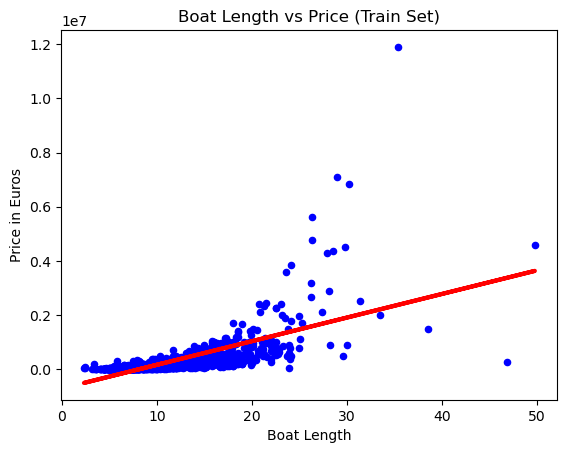

In [31]:
# create a scatterplot using the train data set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s= 20)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Boat Length vs Price (Train Set)')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Price in Euros')
plot_test.show()